### **Sprint - 1**

Import the necessary packages

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

Load the data

In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Data Analysis

In [57]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

The label value is  5


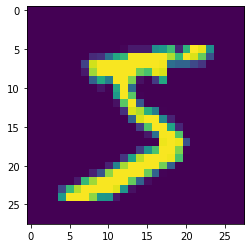

In [ ]:
print("The label value is ",y_train[0])
plt.imshow(X_train[0])

The label value is  0


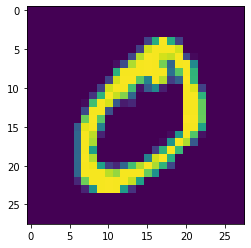

In [ ]:
print("The label value is ",y_train[1])
plt.imshow(X_train[1])

The label value is  2


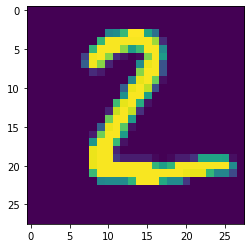

In [ ]:
print("The label value is ",y_test[1])
plt.imshow(X_test[1])

Data Pre-Processing

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
print("After encoding the value 6 of Y_train[0] become", Y_train[0])

After encoding the value 6 of Y_train[0] become [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Create Model

In [58]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [59]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train Model

In [60]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.1964 - accuracy: 0.9538 - val_loss: 0.0754 - val_accuracy: 0.9752
Epoch 2/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.0708 - val_accuracy: 0.9797
Epoch 3/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0443 - accuracy: 0.9855 - val_loss: 0.0832 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0878 - val_accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0941 - val_accuracy: 0.9801


Test Model

In [61]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics : ")
print(metrics)

Metrics : 
[0.09409530460834503, 0.9800999760627747]


In [64]:
prediction = model.predict(X_test[:10])
print(prediction)

1/1 [==============================] - 0s 25ms/step
[[8.18498525e-17 6.85093612e-22 3.88753791e-16 2.73384809e-12
  1.90430306e-21 5.19396550e-18 2.46561582e-25 9.99999940e-01
  1.86548882e-16 2.91812655e-15]
 [4.03209875e-15 7.86466031e-12 9.99999940e-01 2.32137725e-12
  2.36024477e-21 5.45544092e-22 4.34885912e-11 4.44169111e-23
  4.85831756e-15 9.02865054e-19]
 [9.50830734e-11 9.99970376e-01 5.29332411e-10 9.46861513e-12
  2.82804413e-05 1.01959119e-09 6.58605226e-10 1.19204951e-10
  1.33548565e-06 9.44662491e-12]
 [9.99999940e-01 2.27487586e-16 5.65598512e-10 5.24780321e-16
  3.33379352e-19 5.80489339e-15 3.83963039e-09 1.60664190e-18
  3.46455828e-13 8.74205743e-12]
 [4.31696512e-10 1.64680977e-10 1.59664112e-15 2.25476325e-14
  9.99998987e-01 2.11400891e-14 2.13202216e-16 1.72901786e-14
  1.40279964e-14 8.99926363e-07]
 [1.23220060e-14 9.99999940e-01 7.29614784e-15 1.37345349e-13
  8.93672780e-09 7.61004351e-14 1.88390345e-16 1.64504155e-09
  1.30619904e-09 1.15770893e-10]
 [3.81

In [66]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:10])

[7 2 1 0 4 1 4 9 6 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Save Model

In [67]:
model.save("model.h5")

Test Saved Model

In [86]:
model=load_model("model.h5")

In [87]:
from google.colab import files
file = files.upload()

Saving sample.png to sample (1).png


In [88]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 53ms/step
0    9
Name: Label, dtype: int64
